# EDA

This notebook contains most of the EDA we did, including genre distributions, trends over time, word clouds, etc.

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Loading

In [3]:
train_data_df = pd.read_csv('../data/processed/train_data_processed.csv')
train_data_df.head()

,id,title,genre,description,year,processed_description,processed_description_string,language
0,1,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009,"['listen', 'convers', 'doctor', 'parent', '10-...",listen convers doctor parent 10-year-old oscar...,English
1,2,Cupid,thriller,A brother and sister with a past incestuous r...,1997,"['brother', 'sister', 'past', 'incestu', 'rela...",brother sister past incestu relationship curre...,English
2,3,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980,"['bu', 'empti', 'student', 'field', 'trip', 'm...",bu empti student field trip museum natur histo...,English
3,4,The Secret Sin,drama,To help their unemployed father make ends mee...,1915,"['help', 'unemploy', 'father', 'make', 'end', ...",help unemploy father make end meet edith twin ...,English
4,5,The Unrecovered,drama,The film's title refers not only to the un-re...,2007,"['film', 'titl', 'refer', 'un-recov', 'bodi', ...",film titl refer un-recov bodi ground zero also...,English


In [4]:
test_data_df=pd.read_csv("../data/test_data.txt", sep=':::' ,names=["id", "title","description"])
test_datawithsols_df=pd.read_csv("../data/test_data_solution.txt", sep=':::' ,names=["id", "title","genre","description"])

/var/folders/tk/xgt1qkjn2250kh87lr8djx740000gn/T/ipykernel_7738/1851602362.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_df=pd.read_csv("../data/test_data.txt", sep=':::' ,names=["id", "title","description"])
/var/folders/tk/xgt1qkjn2250kh87lr8djx740000gn/T/ipykernel_7738/1851602362.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_datawithsols_df=pd.read_csv("../data/test_data_solution.txt", sep=':::' ,names=["id", "title","genre","description"])


In [5]:
print("Rows in train data",train_data_df.shape[0])
print("Rows in test data", test_data_df.shape[0])

Rows in train data 54214
Rows in test data 54200


In [7]:
##check for empty values in descriptions and genres
train_data_df.isnull().sum()

id                              0
title                           0
genre                           0
description                     0
year                            0
processed_description           0
processed_description_string    0
language                        0
dtype: int64

In [8]:
##check for duplicates --> no duplicates
train_data_df.duplicated().sum()

0

# Data Cleaning

### Cleaning Genres

In [10]:
train_data_df['genre'] = train_data_df['genre'].str.strip()
train_data_df['genre'] = train_data_df['genre'].str.lower()
test_datawithsols_df['genre'] = test_datawithsols_df['genre'].str.strip()
test_datawithsols_df['genre'] = test_datawithsols_df['genre'].str.lower()
test_datawithsols_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# Getting Insights

<AxesSubplot:xlabel='count', ylabel='genre'>

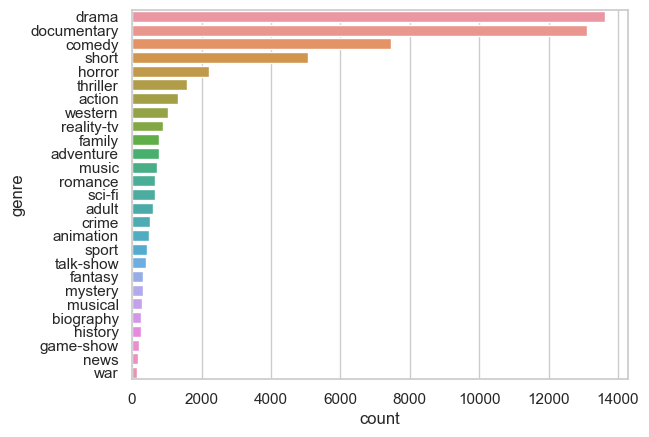

In [11]:
## Barplot of genres present in train_data
sns.set_theme(style="whitegrid")
sns.countplot(y=train_data_df['genre'],order = train_data_df['genre'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='genre'>

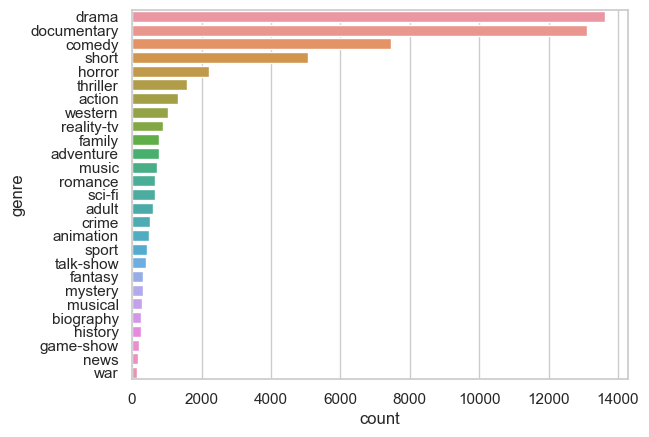

In [12]:
## Barplot of genres present in test_data
sns.countplot(y=test_datawithsols_df['genre'],order = test_datawithsols_df['genre'].value_counts().index)

In [13]:
## Year column has a lot of non numeric columns --> need to clean these rows
train_data_df['year'].value_counts()

2016    3048
2017    3018
2015    2740
????    2415
2014    2324
        ... 
7/XV       1
nced       1
2/VI       1
65/I       1
/XXI       1
Name: year, Length: 271, dtype: int64

In [14]:
train_data_df[(train_data_df['year'].str.isnumeric()) | (train_data_df['year']=='????') ].shape

(52285, 8)

In [15]:
## get index of these clean year columns for later analysis
year_idx = (train_data_df['year'].str.isnumeric()) | (train_data_df['year']=='????')

#### Year vs Genre

In [16]:
## Get top 5 genre counts for each year
count_df = train_data_df[year_idx].groupby(by = ['year','genre'],as_index = False).agg(
Count_of_Genres = pd.NamedAgg(column = 'genre',aggfunc='count')
)
years = train_data_df[year_idx]['year'].unique()
top5genredf = pd.DataFrame(columns=count_df.columns)
for year in years:
    idx = count_df[count_df['year']==year]['Count_of_Genres'].nlargest(5).keys().to_list()
    # print(count_df.iloc[idx])
    # break
    top5genredf = pd.concat([top5genredf,count_df.iloc[idx]],ignore_index=True)
top5genredf = top5genredf.sort_values(by='year')
top5genredf

,year,genre,Count_of_Genres
553,1894,short,4
569,1895,short,2
568,1896,short,3
567,1897,short,9
566,1898,short,4
...,...,...,...
115,????,drama,721
116,????,comedy,322
117,????,documentary,222
118,????,thriller,211


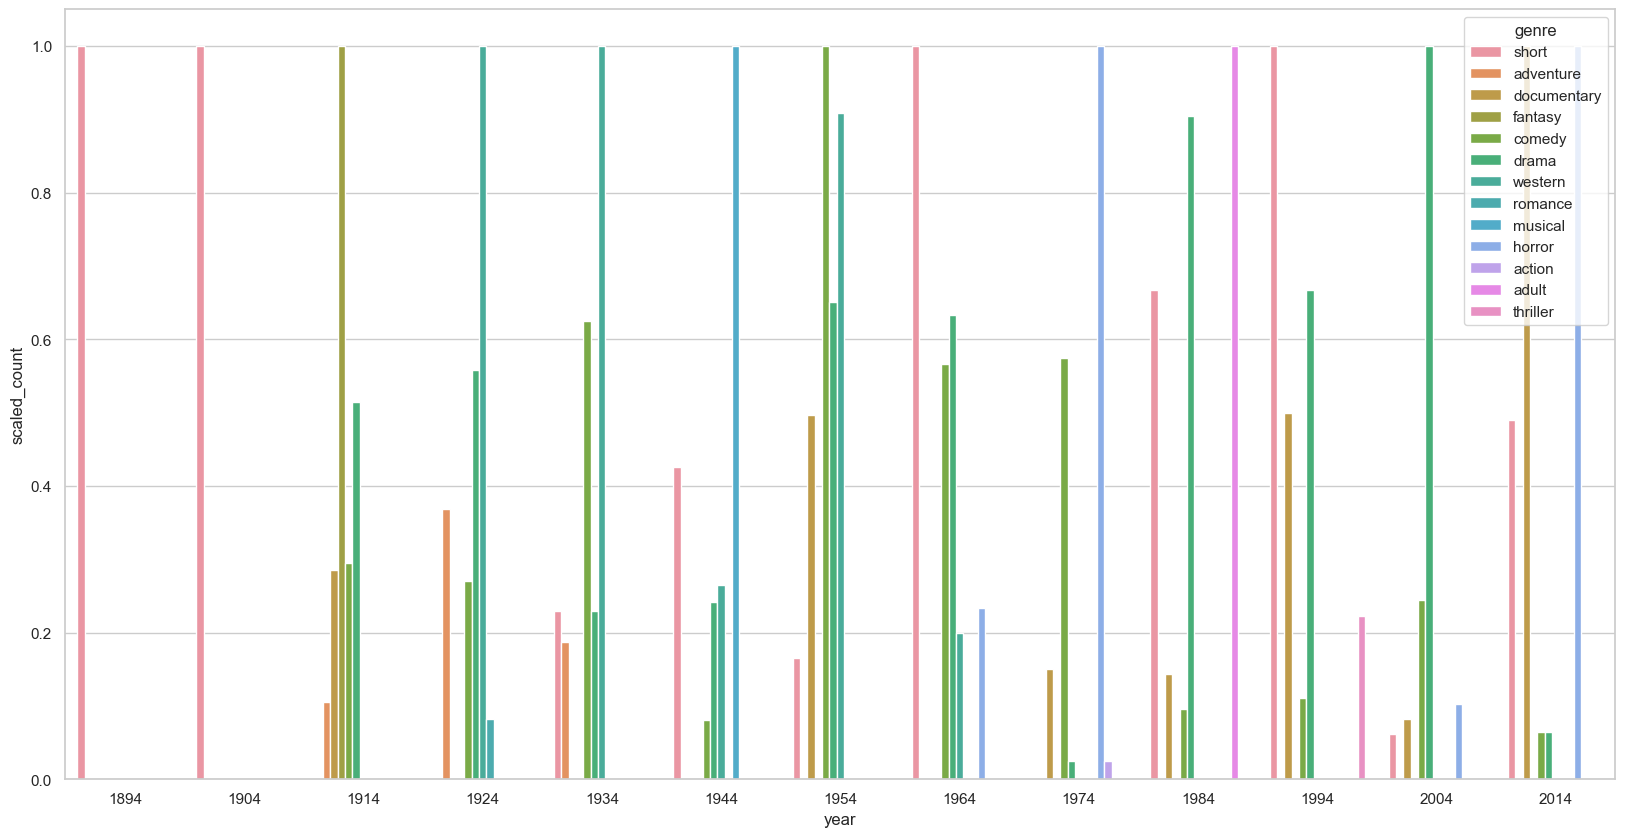

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledcount = []
for year in years:
    res = top5genredf[top5genredf['year']==year][['Count_of_Genres']].apply(lambda x: x / x.max())['Count_of_Genres'].to_list()
    for item in res:
        scaledcount.append(item)
top5genredf['scaled_count']=scaledcount
years_bin = []
count = 0
jump = 50
for i in range(1894,2030,10):
    years_bin.append(str(i))
years_bin
plt.figure(figsize=(20,10))
sns.barplot(x=top5genredf['year'][top5genredf['year'].isin(years_bin)],y=top5genredf['scaled_count'][top5genredf['year'].isin(years_bin)],hue=top5genredf['genre'][top5genredf['year'].isin(years_bin)])
plt.show()

#### Word Counts - Genre Wise

In [18]:
train_data_df['genre'].value_counts()

drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: genre, dtype: int64

In [20]:
genres = train_data_df['genre'].unique()
genre_word_map = {}
column_to_use = 'processed_description'
for genre in genres:
    temp = []
    descriptions = train_data_df[train_data_df['genre']==genre][column_to_use].to_list()
    for item in descriptions:
        wordlist = item.replace('[','').replace(']','').replace("'","").replace('"','').split(',')
        for word in wordlist:
            if word == ' ' or len(word) < 3 or '`' in word:
                continue
            temp.append(word.strip())
    genre_word_map[genre]=temp

In [21]:
train_data_df.head()

,id,title,genre,description,year,processed_description,processed_description_string,language
0,1,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009,"['listen', 'convers', 'doctor', 'parent', '10-...",listen convers doctor parent 10-year-old oscar...,English
1,2,Cupid,thriller,A brother and sister with a past incestuous r...,1997,"['brother', 'sister', 'past', 'incestu', 'rela...",brother sister past incestu relationship curre...,English
2,3,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980,"['bu', 'empti', 'student', 'field', 'trip', 'm...",bu empti student field trip museum natur histo...,English
3,4,The Secret Sin,drama,To help their unemployed father make ends mee...,1915,"['help', 'unemploy', 'father', 'make', 'end', ...",help unemploy father make end meet edith twin ...,English
4,5,The Unrecovered,drama,The film's title refers not only to the un-re...,2007,"['film', 'titl', 'refer', 'un-recov', 'bodi', ...",film titl refer un-recov bodi ground zero also...,English


In [22]:
from collections import Counter 
def most_frequent(List,num=5):
    occurence_count = Counter(List)
    return occurence_count.most_common(num)
num=5
for genre in genres:
    print('\n')
    print("For genre ",genre)
    print(str(num)+" Most common terms and their frequencies are ")
    print(most_frequent(genre_word_map[genre],num=num))



For genre  drama
5 Most common terms and their frequencies are 
[('life', 6491), ('love', 4887), ('live', 4806), ('one', 4661), ('famili', 4310)]


For genre  thriller
5 Most common terms and their frequencies are 
[('find', 603), ('one', 555), ('life', 513), ('murder', 479), ('get', 418)]


For genre  adult
5 Most common terms and their frequencies are 
[('get', 239), ('sex', 225), ('two', 185), ('girl', 178), ('one', 167)]


For genre  documentary
5 Most common terms and their frequencies are 
[('film', 7492), ('documentari', 4755), ('world', 4690), ('stori', 4563), ('life', 4334)]


For genre  comedy
5 Most common terms and their frequencies are 
[('get', 2722), ('one', 2140), ('life', 2002), ('friend', 1948), ('find', 1946)]


For genre  crime
5 Most common terms and their frequencies are 
[('murder', 185), ('polic', 176), ('one', 175), ('crime', 150), ('find', 141)]


For genre  reality-tv
5 Most common terms and their frequencies are 
[('show', 466), ('one', 292), ('seri', 265)

In [23]:
from wordcloud import WordCloud
def makewordcloud(wordlist):
    text = ''
    for word in wordlist:
        text+=' '+word
    wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=100).generate(text)

    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [24]:
def make_histogram(wordlist,num=20):
    elems = most_frequent(wordlist,num)
    x = []
    y = []
    for elem in elems:
        x.append(elem[0])
        y.append(elem[1])
    sns.barplot(y=x,x=y)

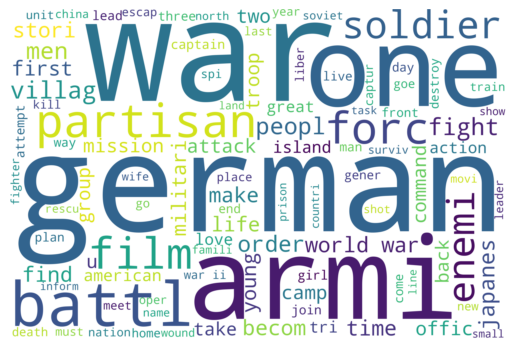

In [25]:
genre = 'war'
makewordcloud(genre_word_map[genre])

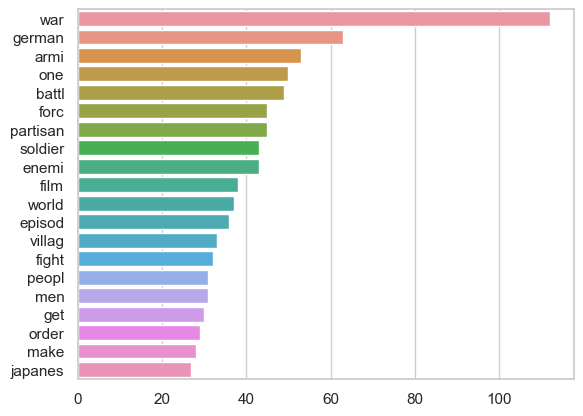

In [26]:
make_histogram(genre_word_map[genre])

#### Change of using words over the years for a genre

In [27]:
def wordcloud_over_years(genre,years):
    yearwordmap = {}
    for year in years:
        temp = []
        descriptions = train_data_df[(train_data_df['year']==year) & (train_data_df['genre']==genre)][column_to_use].to_list()
        for item in descriptions:
            wordlist = item.replace('[','').replace(']','').replace("'","").replace('"','').split(',')
            for word in wordlist:
                if word == ' ' or len(word) < 3 or '`' in word:
                    continue
                temp.append(word.strip())
        if len(temp) == 0:
            continue
        print("For year ",year)
        makewordcloud(temp)


For year  1914


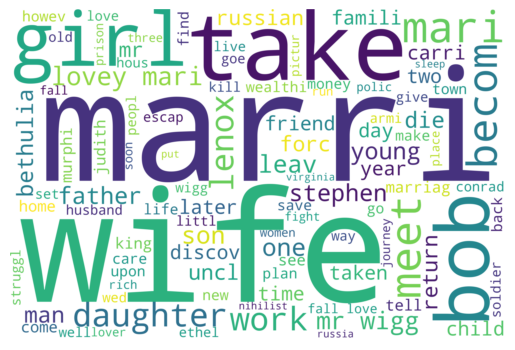

For year  1934


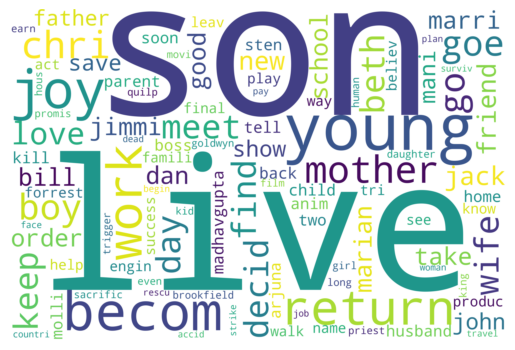

For year  1954


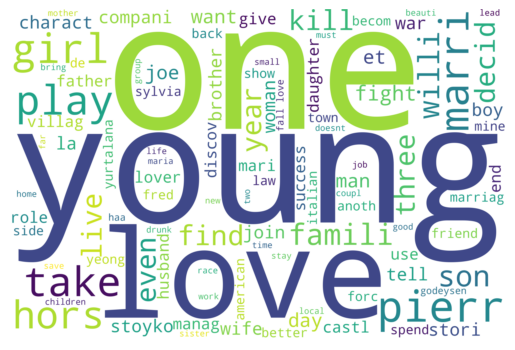

For year  1974


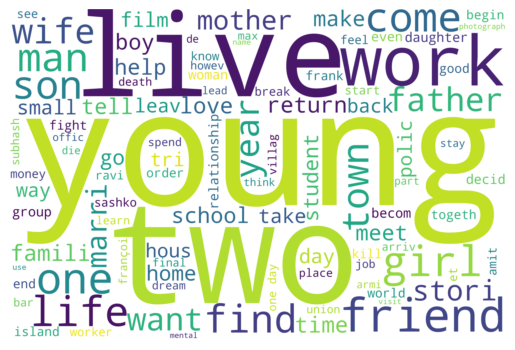

For year  1994


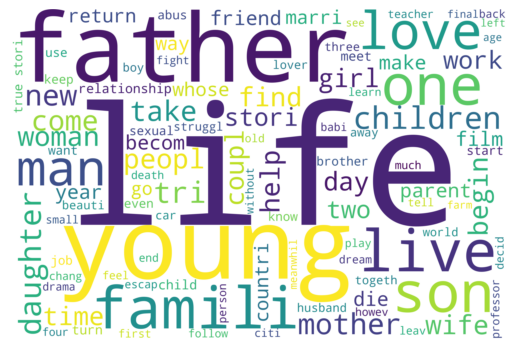

For year  2014


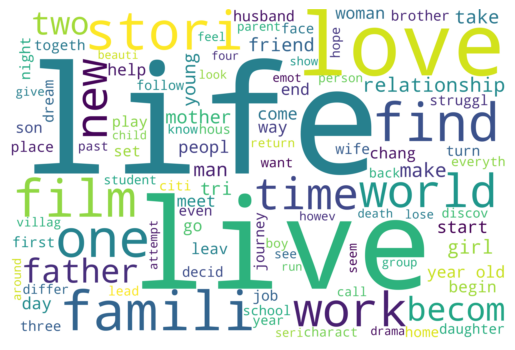

In [28]:
genre = 'drama'
# years_bin = ['2000','2001']
years_bin = []
jump = 20
for i in range(1894,2030,20):
    years_bin.append(str(i))
wordcloud_over_years(genre,years_bin)

In [29]:
years_bin

['1894', '1914', '1934', '1954', '1974', '1994', '2014']

In [32]:
# Descriptions with highest word counts
description_word_count_series = train_data_df['processed_description_string'].map(lambda x: len(x.split(' ')))
print(description_word_count_series.sort_values(ascending=False))
train_data_df.loc[description_word_count_series.idxmax()].processed_description_string

43784    1488
16314    1109
2542     1062
30193     893
25579     782
         ... 
48605       6
40382       6
52224       5
12361       5
4754        4
Name: processed_description_string, Length: 54214, dtype: int64


'jai réalisé en 2009 un film sur mon pčre intitulé gratien gélina un géant aux pie dargil grâce aux archiv jai pu fair revivr celui que lon surnommait ťle pčre du théâtre québécoisť il était décédé dix an auparav et dan le derničr anné de sa vie il avait perdu tout contact avec la réalité alor quil était encor lucid je nai jamai pri le temp de capter sa parol sa réflexion sur la vie en mar 2011 la second épous de mon pčre la comédienn huguett oligni alor âgée de 89 an quittait son appart pour aller vivr en résidenc je connaissai huguett depui prč de 50 an aprč le décč de mčre ell est entré dan vie et au fil du temp jai noué avec ell une relat intim et chaleureus je craignai que confronté au déracin de lentré en résidenc ell perd la forc de vivr au contrair sentant la mort proch belle-mčr ressenti ce passag comm une libérat et sa vision de chose sest transformé sa parol aussi dégagé de lautocensur quell sétait longtemp imposé dentré de jeu ell fait cett révélation étonnant : ťjai passé 

## Earlier Preprocessing and WordClouds

In [33]:
# !pip install wordcloud
from wordcloud import WordCloud


In [34]:
# train_data_df=pd.read_csv("train_data.txt", sep=':::' ,names=["id", "title","genre","description"])
# test_data_df=pd.read_csv("test_data.txt", sep=':::' ,names=["id", "title","description"])
# test_datawithsols_df=pd.read_csv("test_data_solution.txt", sep=':::' ,names=["id", "title","genre","description"])

In [35]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re
stop_words = set(stopwords.words("english"))
def removenumbers(list_):
    pattern = '[0-9]'
    list_ = [re.sub(pattern, '', i) for i in list_]
    return list_
def preprocess(text):
    text = text.strip().lower()
    tokenizer = RegexpTokenizer(r'\w+')
    text_tokens = tokenizer.tokenize(text)
    filtered_list = []
    for word in text_tokens:
        if word.casefold() not in stop_words:
            filtered_list.append(word)
    filtered_list = removenumbers(filtered_list)
    filtered_list = [x for x in filtered_list if x != '']
    answer = ''
    for item in filtered_list:
        answer+=item+ ' '
    answer = answer.strip()
    return answer
train_description_text=''
train_descriptions = train_data_df['description'].tolist()
for description in train_descriptions:
    toadd = description
    train_description_text+= toadd + ' '
train_description_text = preprocess(train_description_text)

In [36]:
train_descriptions[0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [37]:
train_description_text[:200]

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approache'

In [38]:
test_description_text=''
test_descriptions = test_datawithsols_df['description'].tolist()
for description in test_descriptions:
    toadd = description
    test_description_text+= toadd + ' '
test_description_text = preprocess(test_description_text)

In [39]:
def makewordcloud(text):
    wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

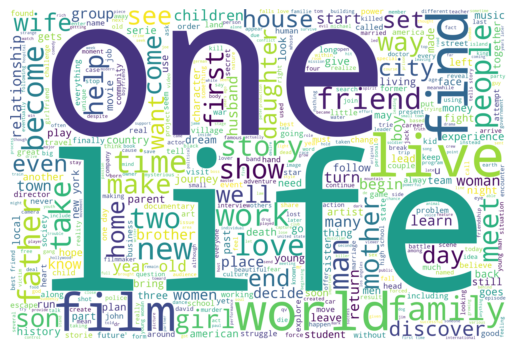

In [40]:
makewordcloud(train_description_text)

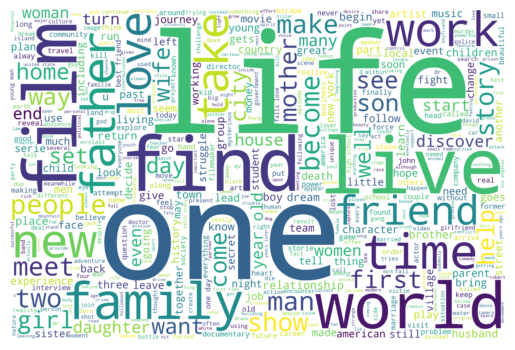

In [41]:
makewordcloud(test_description_text)